<a href="https://colab.research.google.com/github/BimsaraS99/happy-sad-binary-classifier-Tensorflow/blob/main/image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip show tensorflow tensorflow-gpu

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl


In [ ]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = '/content/ImageClassification/data'

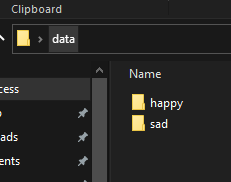

Inside the 'data' folder, store the dataset separately by classes. Each class should have a separate folder that includes the images related to that class.

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

removing none image files from the dataset

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 305 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

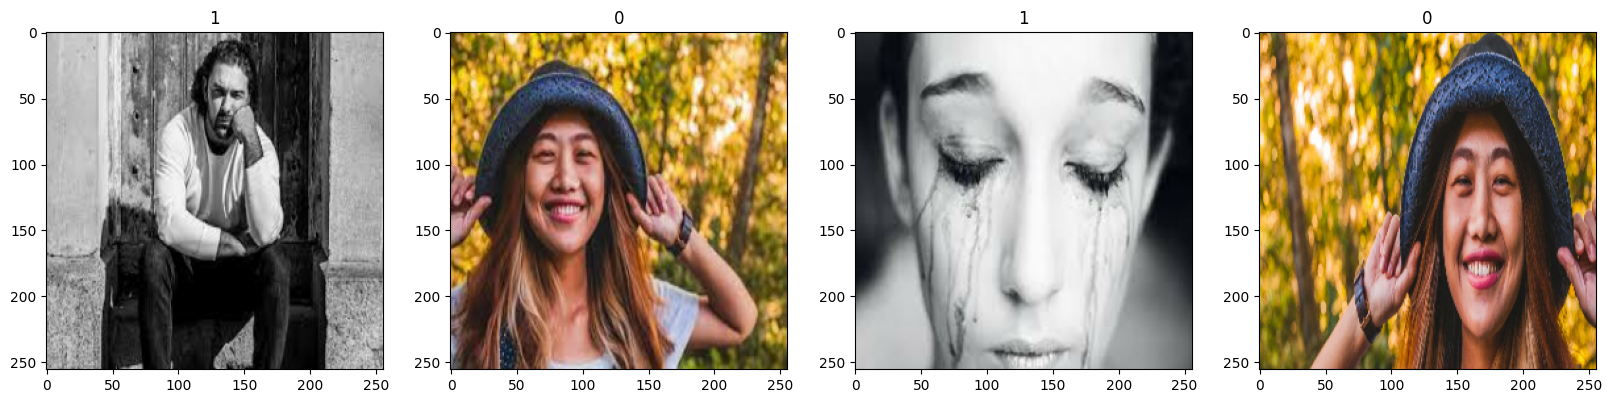

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[8.8627452e-01, 6.7843139e-01, 5.1372552e-01],
          [8.8627452e-01, 6.8081343e-01, 5.2087164e-01],
          [8.8763022e-01, 6.8780488e-01, 5.3100038e-01],
          ...,
          [8.2259345e-01, 6.3043660e-01, 5.1278955e-01],
          [8.3685660e-01, 6.4469975e-01, 5.2705270e-01],
          [8.4638482e-01, 6.5422791e-01, 5.3658086e-01]],
 
         [[8.8602173e-01, 6.7843139e-01, 5.1423103e-01],
          [8.8602173e-01, 6.8112051e-01, 5.2122360e-01],
          [8.8729006e-01, 6.8954957e-01, 5.3514546e-01],
          ...,
          [7.9103404e-01, 5.9887719e-01, 4.8123014e-01],
          [8.0368483e-01, 6.1152798e-01, 4.9388090e-01],
          [8.1290597e-01, 6.2074906e-01, 5.0310200e-01]],
 
         [[8.8151044e-01, 6.7927390e-01, 5.2241117e-01],
          [8.8125455e-01, 6.8616414e-01, 5.2691936e-01],
          [8.8138044e-01, 6.9589448e-01, 5.3811288e-01],
          ...,
          [7.5647992e-01, 5.6432301e-01, 4.4667599e-01],
          [7.6467067e-01, 5.7251382e-

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

7

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
val

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
test

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 30, 30, 16)       

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
history = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 14s 918ms/step - loss: 1.2412 - accuracy: 0.4777 - val_loss: 0.7075 - val_accuracy: 0.5000
Epoch 2/20
7/7 [==============================] - 5s 475ms/step - loss: 0.6896 - accuracy: 0.5089 - val_loss: 0.6618 - val_accuracy: 0.5312
Epoch 3/20
7/7 [==============================] - 6s 627ms/step - loss: 0.6571 - accuracy: 0.5223 - val_loss: 0.6629 - val_accuracy: 0.5000
Epoch 4/20
7/7 [==============================] - 5s 470ms/step - loss: 0.6283 - accuracy: 0.5714 - val_loss: 0.6197 - val_accuracy: 0.5312
Epoch 5/20
7/7 [==============================] - 6s 511ms/step - loss: 0.5997 - accuracy: 0.6875 - val_loss: 0.6331 - val_accuracy: 0.5625
Epoch 6/20
7/7 [==============================] - 8s 905ms/step - loss: 0.6253 - accuracy: 0.7188 - val_loss: 0.5266 - val_accuracy: 0.8281
Epoch 7/20
7/7 [==============================] - 5s 472ms/step - loss: 0.5615 - accuracy: 0.7321 - val_loss: 0.4782 - val_accuracy: 0.8594
Epoch 8/20
7/7 [===

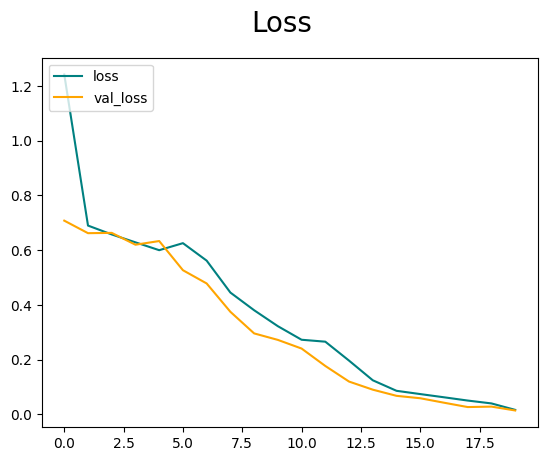

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

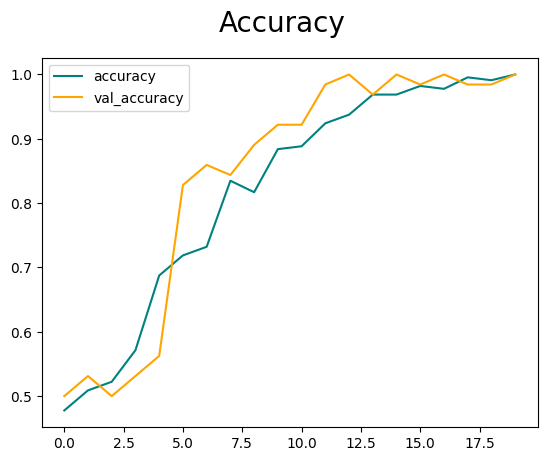

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 462ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import cv2
import matplotlib.pyplot as plt

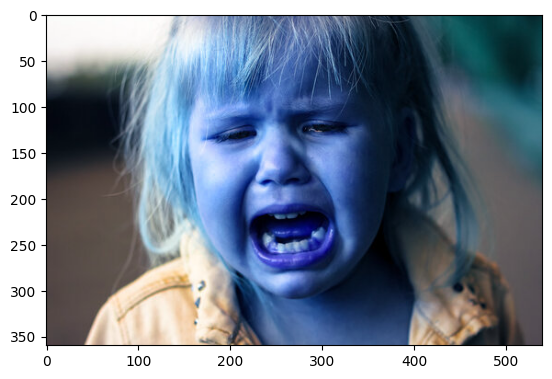

In [ ]:
img = cv2.imread('sre.jpg')
plt.imshow(img)
plt.show()

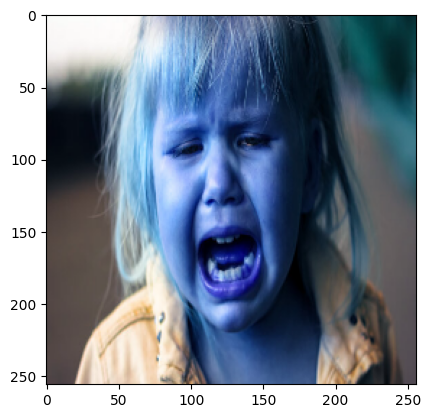

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
loaded_model = load_model('/content/models/imageclassifier.h5')

In [ ]:
def predict_emotion(yhat):
  if yhat > 0.5:
    return 'Sad'
  else:
    return 'Happy'

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))
predict_emotion(yhat)

1/1 [==============================] - 0s 19ms/step


'Sad'